In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, confusion_matrix,  f1_score, precision_score, recall_score, roc_curve
from tensorflow import keras

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


### Dataset

In [3]:
df = pd.read_csv("./dataset/train.csv")
print("Dataset shape:", df.shape)
df.head(5)

Dataset shape: (500000, 36)


,label,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0,1.721656,-2.026168,-1.678496,-0.517512,-0.567964,1.054221,0.069819,1.048858,0.832034,...,1.634686,0.849622,0.315492,-0.338898,-0.412601,1.027683,-1.542995,1.960504,-0.567663,-1.140047
1,0,1.596194,-1.577304,-0.706441,-1.553644,-1.173163,1.054221,0.125655,1.365986,0.756011,...,0.253726,0.901653,-0.305200,-0.221213,-1.351918,0.885052,-1.312088,-0.032521,-0.925837,-0.683991
2,0,2.096867,-0.477000,0.598374,0.239101,-0.209981,-0.850488,0.889856,0.811048,0.357467,...,1.544468,0.391239,1.085081,0.862539,-1.456647,-1.323906,-1.494468,0.947688,-0.288821,-0.364749
3,0,1.019743,-1.411434,-0.872602,0.153695,0.631471,-2.755198,-0.760561,0.143261,-1.253862,...,1.258645,-0.587911,0.110567,0.567624,-1.512797,-0.707736,-2.172718,0.045091,-0.345398,0.045562
4,0,0.877437,-0.507518,-0.818602,0.280093,-0.375073,0.005984,0.342253,0.964911,0.599365,...,0.955726,2.191106,0.429383,-1.432677,-0.407917,0.362277,-2.856638,1.672222,-0.617077,1.829777


In [4]:
X, y = df.iloc[:, 1:].to_numpy(), df["label"].to_numpy()
print(f"X shape: {X.shape}, y shape: {y.shape}")

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True) # random state can be modify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")

X shape: (500000, 35), y shape: (500000,)
X_train shape: (450000, 35), y_train shape: (450000,)
X_valid shape: (50000, 35), y_valid shape: (50000,)


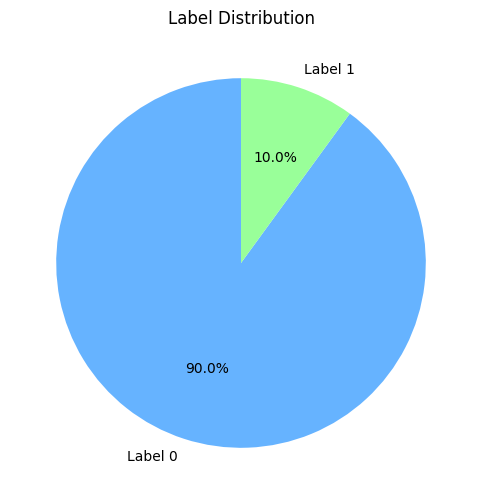

In [7]:
label_counts = np.bincount(y_train)

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=['Label 0', 'Label 1'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Label Distribution')
plt.show()

### Ensemble Model

In [8]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

print(f"RandomForestClassifier score: {rfc.score(X_valid, y_valid)}")

RandomForestClassifier score: 0.93912


### Evaluation

In [7]:
y_pred_train = rfc.predict(X_train)
y_pred_val =  rfc.predict(X_valid)

print(f"F1-score on train: {f1_score(y_train, y_pred_train, average='macro')}") 
print(f"F1-score on valid: {f1_score(y_valid, y_pred_val, average='macro')}") 

F1-score on train: 0.9999691872211096
F1-score on valid: 0.7917796465014876


### Submmit

In [9]:
df_test = pd.read_csv('./dataset/test.csv')

Id = df_test['id'].to_numpy()
X_test = df_test.iloc[:, 1:].to_numpy()
print(f"X_test shape: {X_test.shape}")

X_test shape: (200000, 35)


In [ ]:
y_pred_test = rfc.predict(X_test)

In [11]:
output_data = {'id': Id, 'label': y_pred_test}
output_dataframe = pd.DataFrame(output_data)
print(output_dataframe)

output_dataframe.to_csv("./dataset/y_pred.csv", index=None)

            id  label
0            0      0
1            1      0
2            2      0
3            3      0
4            4      0
...        ...    ...
199995  199995      0
199996  199996      0
199997  199997      1
199998  199998      1
199999  199999      0

[200000 rows x 2 columns]
